In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error 

## Ejemplo generado: 1 variable de entrada y 1 variable de salida

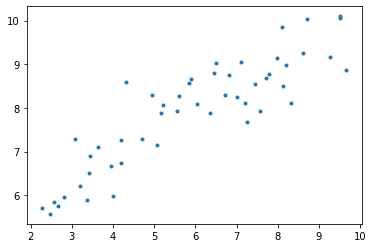

In [2]:
hrs = np.random.uniform(2,10,(50))
calif = hrs*0.5 + 5 + np.random.normal(0,0.5,(50))

plt.figure()
plt.plot(hrs,calif,'.')
plt.show()


In [3]:
model = LinearRegression()
model.fit(np.reshape(hrs,(50,1)),calif)  # calif = model(hrs)
print(model.coef_)
print(model.intercept_)

[0.51087471]
4.900520294151558


# Problema winequality

In [4]:
import pandas
df=pandas.read_csv('winequality-red.csv',sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


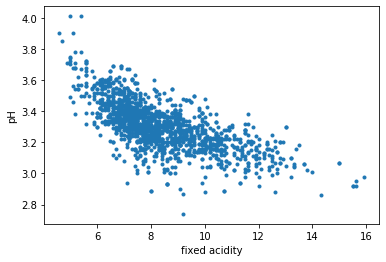

In [5]:
v1,v2 = 0,8
acidity = df.values[:,v1]
ph = df.values[:,v2]
plt.figure()
plt.plot(df.values[:,v1],df.values[:,v2],'.')
plt.xlabel(df.columns[v1])
plt.ylabel(df.columns[v2])
plt.show()

### 1 variable de entrada y 1 variable de salida

In [6]:
model = LinearRegression()
model.fit( np.reshape(acidity,(len(acidity),1)), ph )
print(model.coef_)
print(model.intercept_)
#   ph = acidity * -0.06 + 3.81

[-0.06056103]
3.8149590111969203


### n variables de entrada y 1 variable de salida

In [7]:
quality = df.values[:,-1]
features = df.values[:,:-1]
print('features',features.shape)
print('quality',quality.shape)
print(df.columns[:-1])

features (1599, 11)
quality (1599,)
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


In [8]:
model = LinearRegression()
model.fit( features, quality )
print(model.coef_)
print(model.intercept_)

[ 2.49905527e-02 -1.08359026e+00 -1.82563948e-01  1.63312698e-02
 -1.87422516e+00  4.36133331e-03 -3.26457970e-03 -1.78811638e+01
 -4.13653144e-01  9.16334413e-01  2.76197699e-01]
21.96520844945205


## Muestra de entrenamiento y prueba

In [9]:
n = 20
idx = np.random.permutation(n)
print(idx)
print('train',idx[:int(n*0.7)])
print('test',idx[int(n*0.7):])

#x_training = 

[13  7 12  8  4  3 19 15  6 18  9 14  2  1  0 16 11 17  5 10]
train [13  7 12  8  4  3 19 15  6 18  9 14  2  1]
test [ 0 16 11 17  5 10]


In [10]:
n = len(df.values)
idx = np.random.permutation(n)
idx_train = idx[:int(n*0.7)]
idx_test = idx[int(n*0.7):]

x_train = df.values[ idx_train, :-1 ]
x_test = df.values[ idx_test , :-1 ]
y_train = df.values[ idx_train, -1 ]
y_test = df.values[ idx_test , -1 ]
print('train',x_train.shape,y_train.shape)
print('test',x_test.shape,y_test.shape)

train (1119, 11) (1119,)
test (480, 11) (480,)


In [11]:
model = LinearRegression()
model.fit( x_train , y_train )
y_pred = model.predict( x_test )
print('y_test',y_test[:10])
print('y_pred',y_pred[:10])

y_test [5. 5. 8. 7. 6. 6. 6. 5. 7. 5.]
y_pred [4.78886978 5.05631972 6.0970685  5.97385119 5.10329837 6.1441953
 5.40412891 5.60836249 6.39959646 4.71756569]


## Error medio absoluto

In [12]:
error = 0
for yi, yt in zip(y_test,y_pred):
    error += abs(yi-yt)
error = error/len(y_test)
print('Error medio absoluto:',error)

Error medio absoluto: 0.5464584714011419


In [13]:
error = mean_absolute_error(y_test,y_pred)
print('Error medio absoluto:',error)

Error medio absoluto: 0.5464584714011422


## Normalización

In [23]:
xtrain_norm = np.zeros(x_train.shape,float)
xtest_norm = np.zeros(x_test.shape,float)

# Cálculo de los promedios y desviación estándar debe ser sobre los datos de entrenamiento
ncolumns = x_train.shape[1]
avr = np.zeros((ncolumns),float)
std = np.zeros((ncolumns),float)
for i in range(ncolumns):
    print(df.columns[i])
    print('  min:',np.min(x_train[:,i]),'max',np.max(x_train[:,i]))
    avr[i] = np.mean(x_train[:,i])
    std[i] = np.std(x_train[:,i])
    
    xtrain_norm[:,i] = (x_train[:,i]-avr[i])/std[i]
    xtest_norm[:,i] = (x_test[:,i]-avr[i])/std[i]
    print('  min:',np.min(xtrain_norm[:,i]),'max',np.max(xtrain_norm[:,i]))

fixed acidity
  min: 4.6 max 15.9
  min: -2.1648348314051553 max 4.350848066973586
volatile acidity
  min: 0.16 max 1.58
  min: -2.0860546701287754 max 6.010722568268383
citric acid
  min: 0.0 max 1.0
  min: -1.4172369762189203 max 3.762018988473998
residual sugar
  min: 0.9 max 15.5
  min: -1.139580695742414 max 8.799977074062783
chlorides
  min: 0.034 max 0.611
  min: -1.182034010938203 max 11.635735388887014
free sulfur dioxide
  min: 1.0 max 72.0
  min: -1.4495942108387587 max 5.51787670219119
total sulfur dioxide
  min: 6.0 max 289.0
  min: -1.2604591650417325 max 7.618310912876272
density
  min: 0.9900700000000001 max 1.00369
  min: -3.674351360982138 max 3.731779957101889
pH
  min: 2.74 max 3.9
  min: -3.7988554017616263 max 3.9311790320968463
sulphates
  min: 0.37 max 2.0
  min: -1.7818077559136722 max 8.177630502709336
alcohol
  min: 8.4 max 14.9
  min: -1.8943929186422945 max 4.270602224009019


In [26]:
model = LinearRegression()
model.fit( xtrain_norm , y_train )
y_pred = model.predict( xtest_norm )
error = mean_absolute_error(y_test,y_pred)
print('Error medio absoluto:',error)

Error medio absoluto: 0.5464584714011426
